In [1]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

# to check if actual tariffs get calculated
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# file_path = 'tau_ijs.pickle'

# with open(file_path, 'rb') as file:
#     data = pickle.load(file)

# print(data)

# Define countries and industries
countries = ['China', 'Korea', 'Japan', 'USA', 'Germany']
industries = ['steel', 'semi', 'car']
num_countries = len(countries)
num_industries = len(industries)

# Initialize dictionaries with varied values
pol_econ = {country: {industry: np.random.rand() for industry in industries} for country in countries}
# x = {country: {industry: np.random.rand() for industry in industries} for country in countries}

x = { #우선 김은 임의로 100으로 채움
         #단위는 billion USD
    'Korea':{'steel':65.85, 'semi':19.8, 'car':188.856},
    'USA': {'steel':4.14, 'semi':80.5, 'car':768.0},
    'China': {'steel':421.18, 'semi':193.6, 'car':772},
    'Japan':{'steel':58.92, 'semi':51.9, 'car':476.784},
    'Germany':{'steel':44.50, 'semi':41.2, 'car': 614.313}
}

# used when calculating welfare
p_is = {
    'China': {
        'Germany': {'gim': 11.113849080349386, 'steel': 1.0582132952603989, 'semi': 0.8749017013649593, 'car': 22347.52148025721}, 
        'Japan': {'gim': 4.702912149549132, 'steel': 0.6545231939214761, 'semi': 1.3782939026477783, 'car': 28876.362273677052}, 
        'Korea': {'gim': 1.9437738767665877, 'steel': 0.6248022737655794, 'semi': 3.2280803660391775, 'car': 27254.069456311554}, 
        'USA': {'gim': 7.338449268069469, 'steel': 1.2736582321419347, 'semi': 1.4443405822490798, 'car': 6412.672705308079}}, 
    'Germany': {
        'China': {'gim': 38.2548102189781, 'steel': 1.380815010542162, 'semi': 0.2344066978065146, 'car': 67597.35761649995}, 
        'Japan': {'steel': 1.8565627953727868, 'semi': 0.8579526696580784, 'car': 43312.870251408094}, 
        'Korea': {'gim': 193.40293333333332, 'steel': 2.0382712213649143,'semi': 3.0795445270513784, 'car': 53270.511687146936}, 
        'USA': {'gim': 144.169, 'steel': 0.9205237153804969, 'semi': 1.1508868485166053, 'car': 63936.47417704994}}, 
    'Japan': {
        'China': {'gim': 8.886296287788753, 'steel': 0.7661557893436499,  'semi': 1.9214838065500246, 'car': 34435.358268213306}, 
        'Germany': {'gim': 30.806603908794788, 'steel': 1.009475489607891,  'semi': 5.56617554347278, 'car': 24246.767236564578}, 
        'Korea': {'gim': 11.861566270365477, 'steel': 0.6452938452728846,  'semi': 2.576506085798766, 'car': 25945.71517654626}, 
        'USA': {'gim': 37.98874077567761, 'steel': 0.6924101202128765, 'semi': 5.473356193407144, 'car': 27683.734550894653}}, 
    'USA': {
        'China': {'steel': 2.793492934160387,  'semi': 1.8820447349060032, 'car': 59753.32634173833, 'gim': 202.66666666666666}, 
        'Germany': {'gim': 10.990251530053763, 'steel': 0.9743858548405673, 'semi': 20.99480847346542, 'car': 45214.10895838236}, 
        'Japan': {'gim': 12.888821246314357, 'steel': 3.19057747932092, 'semi': 1.4593678187228334, 'car': 51928.2106433143}, 
        'Korea': {'gim': 17.13888888888889, 'steel': 3.5832969128690055, 'semi': 3.497620193153412, 'car': 47727.025701300736}}, 
    'Korea': {
        'China': {'gim': 11.346897999992917, 'steel': 0.8095350234608575, 'semi': 2.9933717074944526, 'car': 24573.867215686274}, 
        'Germany': {'gim': 12.498771320251953, 'steel': 1.0443284707421892, 'semi': 3.0795445270513784, 'car': 31550.779572362917}, 
        'Japan': {'gim': 10.377253137100842, 'steel': 0.760506783231565, 'semi': 2.1596662328607987, 'car': 18812.184776746457}, 
        'USA': {'gim': 16.36964135872177, 'steel': 0.9889283307131168, 'semi': 6.354314554989172, 'car': 24121.347339170934}
        }            
    }


P_j = {'Germany':131.8924482,
        'China':132.2291519,
        'Japan':111.3640359,
        'Korea':129.1901759,
        'USA':139.7357936
}



# tau = {i: {j: {industry: np.random.rand() + 1 for industry in industries} for j in countries} for i in countries}
tau = {
    'China': {
        'Korea': {'gim': 1.18, 'steel': 1, 'semi': 1, 'car': 1.059},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1.25, 'car': 1.2275},
        'Germany': {'gim': 1, 'steel': 1.359, 'semi': 1, 'car': 1.03}
    },
    'Korea': {
        'China': {'gim': 1.08, 'steel': 1.005, 'semi': 1.01, 'car': 1.04},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1}
    },
    'Japan': {
        'China': {'gim': 1.175, 'steel': 1.044, 'semi': 1, 'car': 1.077},
        'Korea': {'gim': 1.2, 'steel': 1, 'semi': 1, 'car': 1.065},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1.0212},
        'Germany': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1}
    },
    'USA': {
        'China': {'gim': 1.2, 'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'Germany': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1.03}
    },
    'Germany': {
        'China': {'gim': 1.2, 'steel': 1.05, 'semi': 1, 'car': 1.085},
        'Korea': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1},
        'Japan': {'gim': 1.4, 'steel': 1, 'semi': 1, 'car': 1},
        'USA': {'gim': 1, 'steel': 1, 'semi': 1, 'car': 1.0212}
    }
}


sigma = {'gim': 3.57, 'steel': 4.0, 'semi': 2.5, 'car': 1.8}

t = {'Korea': {'USA': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}, 
               'China': {'steel': 0.005, 'semi': 0.01, 'car': 0.04}, 
               'Japan': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}, 
               'Germany': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}}, 
    'USA': {'Korea': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}, 
            'China': {'steel': 0.05, 'semi': 1e-10, 'car': 0.085}, 
            'Japan': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}, 
            'Germany': {'steel': 1e-10, 'semi': 1e-10, 'car': 0.03}}, 
    'China': {'Korea': {'steel': 1e-10, 'semi': 1e-10, 'car': 0.059}, 
              'USA': {'steel': 1e-10, 'semi': 0.25, 'car': 0.2275}, 
              'Japan': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}, 
              'Germany': {'steel': 0.359, 'semi': 1e-10, 'car': 0.03}}, 
    'Japan': {'Korea': {'steel': 1e-10, 'semi': 1e-10, 'car': 0.065}, 
              'USA': {'steel': 1e-10, 'semi': 1e-10, 'car': 0.0212}, 
              'China': {'steel': 0.044, 'semi': 1e-10, 'car': 0.077}, 
              'Germany': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}}, 
    'Germany': {'Korea': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}, 
                'USA': {'steel': 1e-10, 'semi': 1e-10, 'car': 0.0212}, 
                'Japan': {'steel': 1e-10, 'semi': 1e-10, 'car': 1e-10}, 
                'China': {'steel': 0.05, 'semi': 1e-10, 'car': 0.085}}}

#계산함
pi = {country: {industry: 0 for industry in industries} for country in countries}
alpha = {i: {j: {industry: 0 for industry in industries} for j in countries} for i in countries}
gamma = {i: {j: {industry: 0 for industry in industries} for j in countries} for i in countries}


# optimum tariff only has one game. The initial value becomes 1
pi_hat = {country: {industry: 1 for industry in industries} for country in countries}
tau_hat = {i: {j: {industry: 1 for industry in industries} for j in countries} for i in countries}
t_hat = {i: {j: {industry: 1 for industry in industries} for j in countries} for i in countries}

# w_hat = {country: 1 for country in countries}
w = {'Korea':16.64, 'USA':33.7, 'China':6.21, 'Japan':12.33, 'Germany':25.34}


T = {
    'China': {'Germany': {'gim': 38120.0, 'steel': 582083.0, 'semi': 119516177.0, 'car': 1833609424.0}, 
              'Japan': {'gim': 20212670.0, 'steel': 83818503.0, 'semi': 535757854.0, 'car': 676593127.0}, 
              'Korea': {'gim': 248805.0, 'steel': 1803944738.0, 'semi': 15219366037.0, 'car': 1212097485.0}, 
              'USA': {'gim': 2316260.0, 'steel': 1358591.0, 'semi': 341810421.0, 'car': 2638478640.0}
            }, 
    'Germany': {'China': {'gim': 5240.909, 'steel': 5201023.164, 'semi': 19331662.139, 'car': 16512164176.907999}, 
                'Japan': {'gim': 110, 'steel': 40160.479, 'semi': 693421.891, 'car': 4282380533.395}, 
                'Korea': {'gim': 2901.044, 'steel': 681557.131, 'semi': 3842475.101, 'car': 6468871825.364}, 
                'USA': {'gim': 432.507, 'steel': 51998280.381, 'semi': 12024057.385, 'car': 28218169963.792}
            }, 
    'Japan': {'China': {'gim': 1022148.922, 'steel': 777891701.735, 'semi': 4241031727.742, 'car': 6714475489.161}, 
              'Germany': {'gim': 206532.406, 'steel': 12493288.74, 'semi': 40437523.308, 'car': 2518119540.9589996}, 
              'Korea': {'gim': 53875.234, 'steel': 1873216558.145, 'semi': 20384960.593, 'car': 746276605.623}, 
              'USA': {'gim': 8536153.179, 'steel': 141884446.045, 'semi': 57715066.618, 'car': 43064344998.029}
            }, 
    'USA': {'China': {'gim': 608.0, 'steel': 487349.0,'semi': 41034340.0, 'car': 6554910660.0}, 
            'Germany': {'gim': 861724.0, 'steel': 75461.0, 'semi': 18155007.0, 'car': 9157689622.0}, 
            'Japan': {'gim': 439247.0, 'steel': 1199499.0, 'semi': 14758843.0, 'car': 1277318495.0}, 
            'Korea': {'gim': 169675.0, 'steel': 180376.0,'semi': 15309944.0, 'car': 2740915359.0}
            }, 
    'Korea': {'China': {'gim': 48062453.0, 'steel': 543488181.0,  'semi': 34451077419.0, 'car': 313316807.0}, 
              'Germany': {'gim': 1055190.583, 'steel': 52080498.965, 'semi': 156173609.446, 'car': 11664726.954}, 
              'Japan': {'gim': 104775627.791, 'steel': 921335767.82, 'semi': 419536125.294, 'car': 495404.448}, 
              'USA': {'gim': 33963781.0, 'steel': 581315367.0, 'semi': 236493837.0, 'car': 883492635.0}
            }
}


gamma_denom = {j: {industry: 0 for industry in industries} for j in countries}

def fill_gamma_denom():
    for j in countries:
        for s in industries:
            # gamma_denom[j][s] = 0
            for m in countries:
                if m != j:
                    gamma_denom[j][s] += tau[m][j][s] * T[m][j][s]
                

def fill_gamma():
    fill_gamma_denom()
    for i in countries:
        for j in countries:
            for s in industries:
                if i != j:
                    gamma[i][j][s] = tau[i][j][s] * T[i][j][s] / gamma_denom[j][s]
                

fill_gamma()

def fill_pi():
    for j in countries:
        for s in industries:
            for i in countries:
                if i != j:
                    pi[j][s] += 1/sigma[s] * T[i][j][s]

fill_pi()

alpha_denom = {j: {industry: 0 for industry in industries} for j in countries}

def fill_alpha_denom():
    for i in countries:
        for s in industries:
            for n in countries:
                if i != n:
                    alpha_denom[i][s] += T[i][n][s]            

def fill_alpha():
    fill_alpha_denom()
    for i in countries:
        for j in countries:
            for s in industries:
                if i != j:
                    alpha[i][j][s] += T[i][j][s] / alpha_denom[i][s]               

fill_alpha()

# Welfare function
def welfare(j, s):
    return x[j][s] + P_j[j]

def gov_obj(tau_js, j):
    tau_copy = {i: {industry: 0 for industry in industries} for i in countries if i != j}
    idx = 0
    for industry in industries:
        for country in countries:
            if country != j:
                tau_copy[country][industry] = tau_js[idx]
                idx += 1
    # Rest of the function remains the same
    total = 0
    for s in industries:
        total += pol_econ[j][s] * welfare(j, s)
    return -total  # We minimize, so we return the negative

# Constraint 1 for country j and industry s
def eq_12(j, s):
    total = 0
    for i in countries:
        if i != j:
            total += (gamma[i][j][s] * (tau[i][j][s] ** (1 - sigma[s]))) ** (1 / (1 - sigma[s]))
    return total - 1  # Constraint to be equal to 1

# Constraint 2 helper functions
def x2(j):
    total = 0
    for i in countries:
        for s in industries:
            if i != j:
                total += t[i][j][s] * T[i][j][s]
    return total

def wL(j):
    term2 = 0
    for i in countries:
        for s in industries:
            if i != j:
                term2 += t[i][j][s] * T[i][j][s]

    term3 = 0
    for s in industries:
        term3 += pi[j][s]

    return x2(j) - term2 - term3

def complicated(j):
    total = 0
    for i in countries:
        for s in industries:
            if i != j:
                total += (t[i][j][s] * T[i][j][s] / x2(j) * t_hat[i][j][s] * 
                        (eq_12(j, s) ** (sigma[s] - 1)) * (tau_hat[i][j][s] ** -sigma[s]) + (pi[j][s] / x2(j) * pi_hat[j][s]))
    return total

def term3(j):
    total = 0
    for s in industries:
        for i in countries:
            if i != j:
                total += (pi[j][s] / x2(j) * pi_hat[j][s]) * alpha[j][i][s] * (tau_hat[j][i][s] ** -sigma[s]) * (w[i] ** (1 - sigma[s])) * (eq_12(i, s) ** (sigma[s] - 1))
    return total

# def eq_13(j):
#     term1 = wL(j) / x2(j)
#     term2 = complicated(j)
#     term3 = 0

#     for s in industries:
#         term3 += pi[j][s] / x2(j) * pi_hat[j][s]
    
#     sum = (term1) / (1 - term2 - term3)

#     return term1 + term2 + term3 - 1  # Constraint to be equal to 1
def eq_13(j):
    epsilon = 1e-10
    term1 = wL(j) / (x2(j) + epsilon)
    term2 = complicated(j)
    term3 = 0

    for s in industries:
        term3 += pi[j][s] / (x2(j) + epsilon) * pi_hat[j][s]
    
    sum = (term1) / (1 - term2 - term3 + epsilon)

    return term1 + term2 + term3 - 1

# Constraint 3 for country i and industry s
def eq_10(i, s):
    total = 0
    for j in countries:
        if i != j:
            total += (alpha[i][j][s] * (tau_hat[i][j][s] ** -sigma[s]) * 
                    (w[i] ** (1 - sigma[s])) * (eq_12(j, s) ** (sigma[s] - 1)) * eq_13(j))
    return total - 1  # Constraint to be equal to 1

# # Constraints as a list for country j
# def constraints(tau_js, j):
#     tau_copy = {i: {k: {industry: 0 for industry in industries} for k in countries} for i in countries}
#     for i, industry in enumerate(industries):
#         for k, country in enumerate(countries):
#             if country != j:
#                 tau_copy[country][j][industry] = tau_js[i * num_countries + k]
#                 # tau_copy[country][j][industry] = tau_js[j][industry]
#     cons = []
#     for s in industries:
#         cons.append({'type': 'eq', 'fun': lambda tau_js, j=j, s=s: eq_12(j, s)})
#     cons.append({'type': 'eq', 'fun': lambda tau_js, j=j: eq_13(j)})
#     for i in countries:
#         for s in industries:
#             cons.append({'type': 'eq', 'fun': lambda tau_js, i=i, s=s: eq_10(i, s)})
#     return cons
def constraints(tau_js, j):
    tau_copy = {i: {industry: 0 for industry in industries} for i in countries if i != j}
    idx = 0
    for industry in industries:
        for country in countries:
            if country != j:
                tau_copy[country][industry] = tau_js[idx]
                idx += 1
    cons = []
    for s in industries:
        cons.append({'type': 'eq', 'fun': lambda tau_js, j=j, s=s: eq_12(j, s)})
    cons.append({'type': 'eq', 'fun': lambda tau_js, j=j: eq_13(j)})
    for i in countries:
        for s in industries:
            cons.append({'type': 'eq', 'fun': lambda tau_js, i=i, s=s: eq_10(i, s)})
    return cons

def calculate_optimum_tariffs():
    global tau, t
    optimal_taus = {i: {j: {industry: 0 for industry in industries} for j in countries if j != i} for i in countries}
    
    for i in countries:
        for j in countries:
            if j == i:
                continue
            initial_tau_js = np.random.rand(num_industries * (num_countries - 1)) * 0.5 + 1.0
            result = minimize(gov_obj, initial_tau_js, args=(j,), constraints=constraints(initial_tau_js, j))
            
            for k, industry in enumerate(industries):
                idx = 0
                for country in countries:
                    if country != i:
                        optimal_taus[i][country][industry] = result.x[k * (num_countries - 1) + idx]
                        idx += 1
    
    return optimal_taus

# Initialize storage for animation
tau_history = []

for iteration in range(100):
    print(f"Iteration {iteration + 1}")
    new_taus = calculate_optimum_tariffs()
    
    tau_snapshot = {i: {j: {industry: new_taus[i][j][industry] for industry in industries} for j in countries if j != i} for i in countries}
    tau_history.append(tau_snapshot)
    
    # Update tau with new values and adjust t accordingly
    for i in countries:
        for j in countries:
            if j != i:
                for industry in industries:
                    tau[i][j][industry] = new_taus[i][j][industry]
                    # Update t based on tau
                    new_t = tau[i][j][industry] - 1
                    t[i][j][industry] = max(new_t, 1e-10)
    
    fill_gamma()
    fill_pi()
    fill_alpha()
# Save the tau_history to a file
import pickle
with open('tau_history.pkl', 'wb') as f:
    pickle.dump(tau_history, f)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

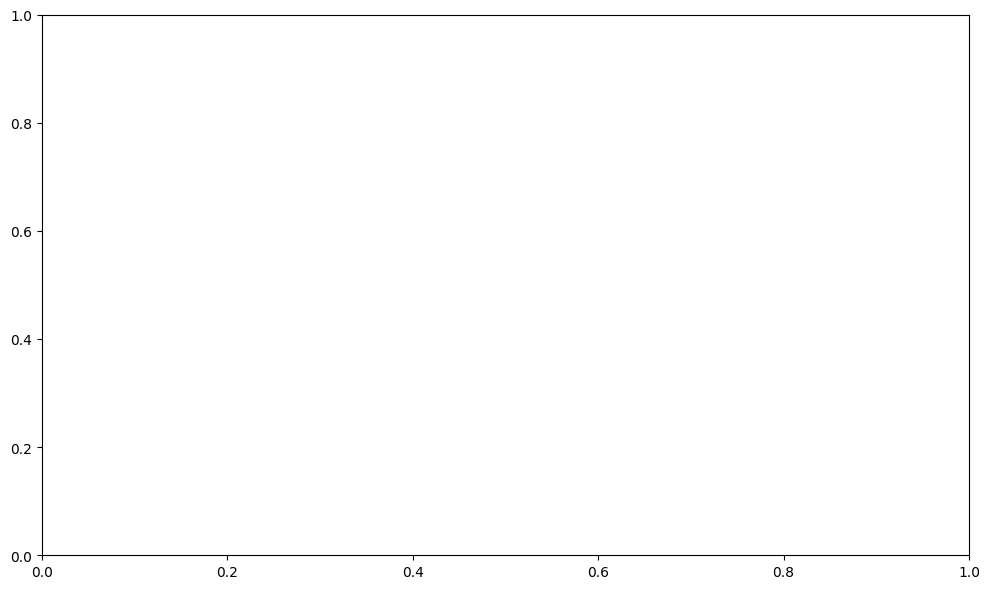

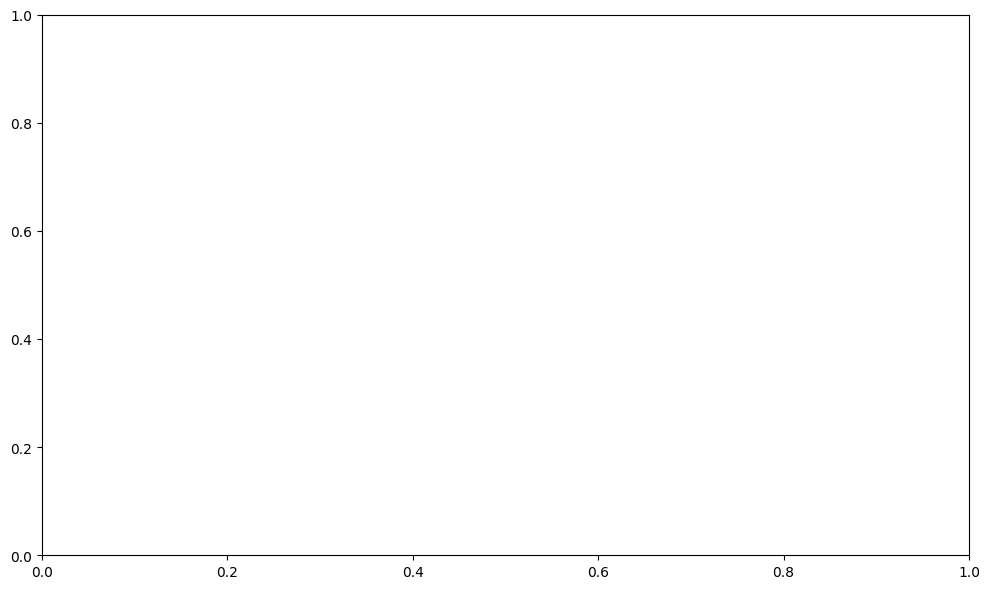

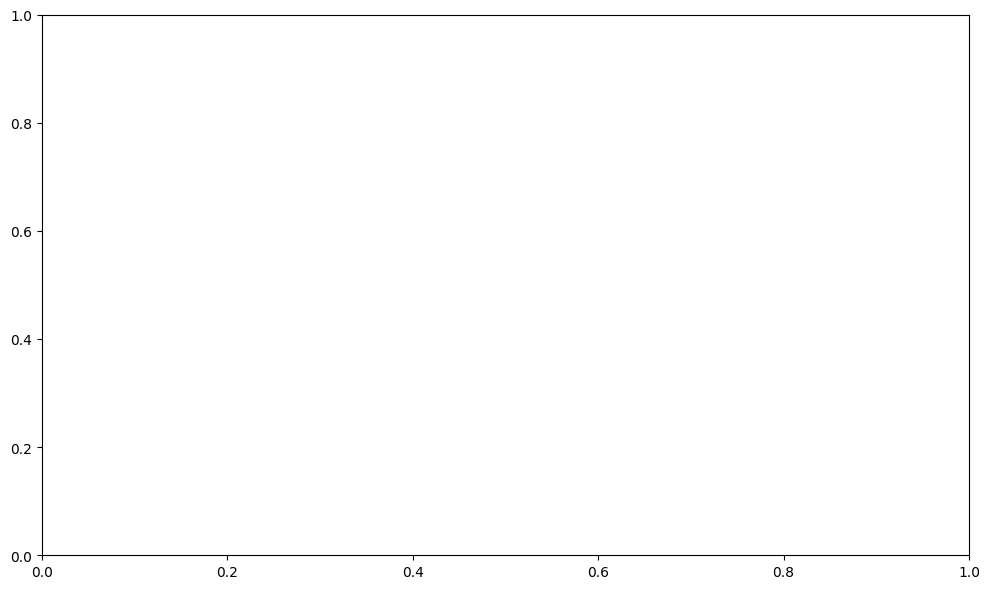

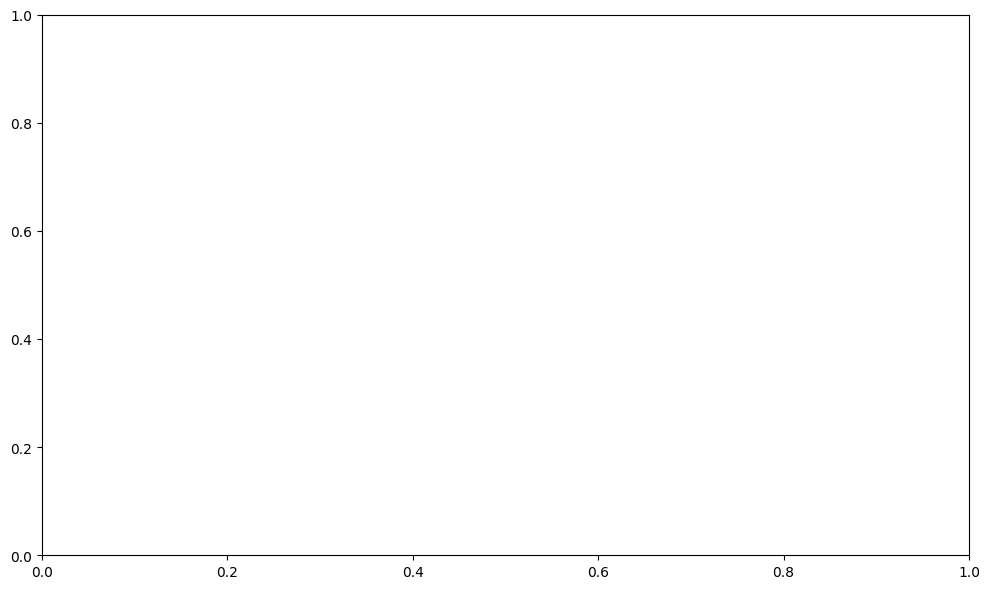

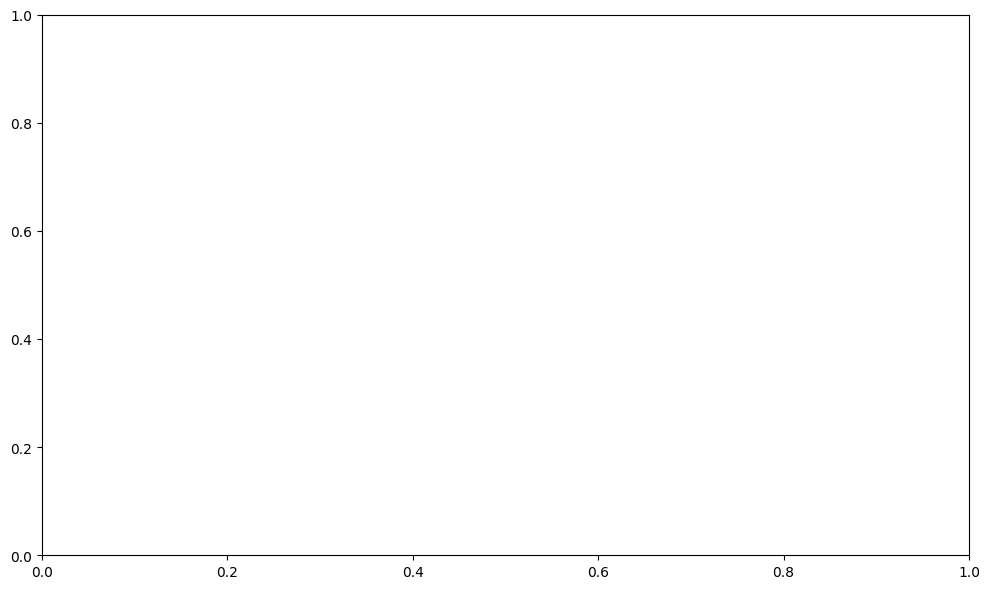

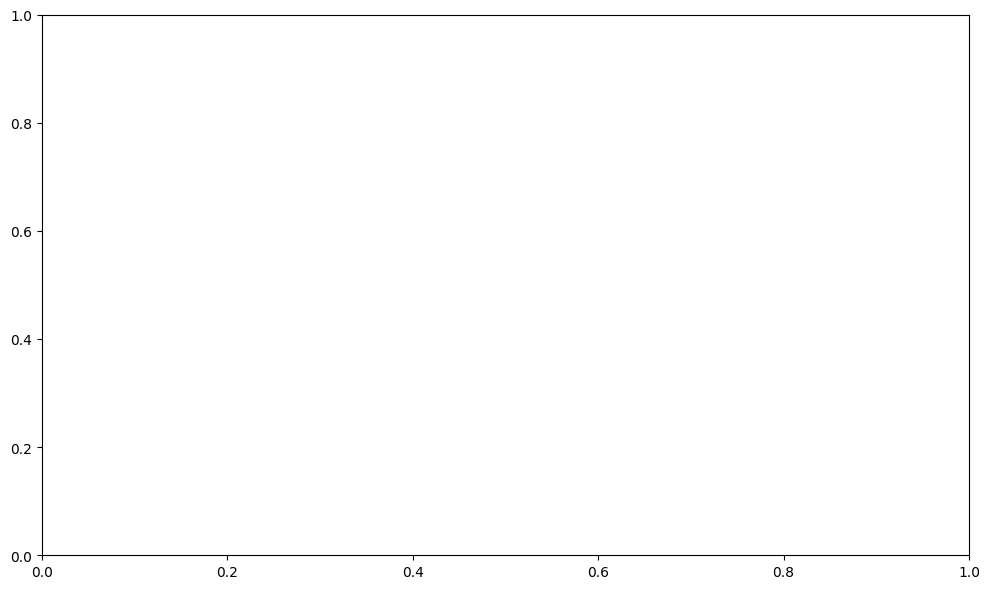

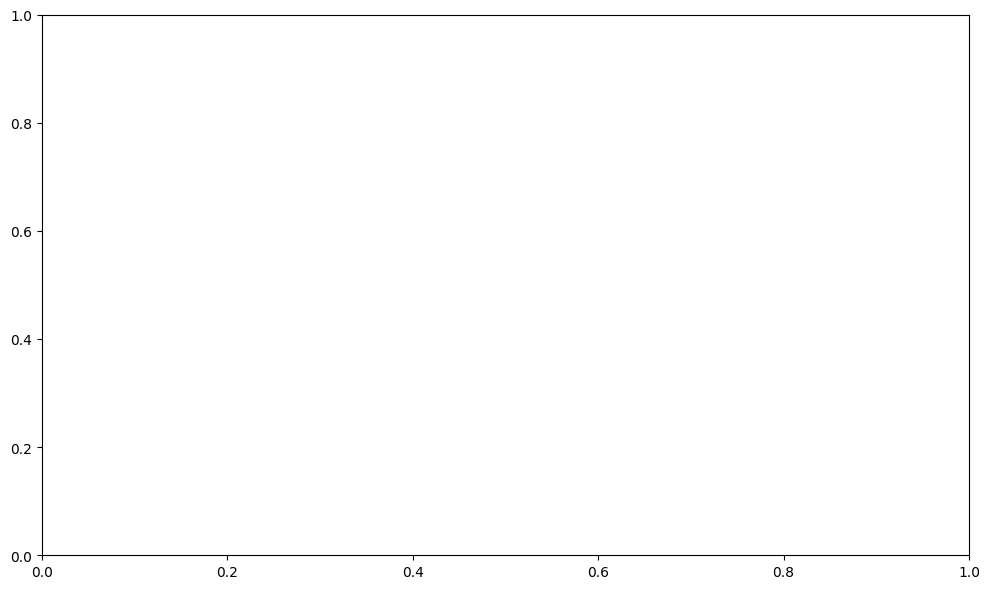

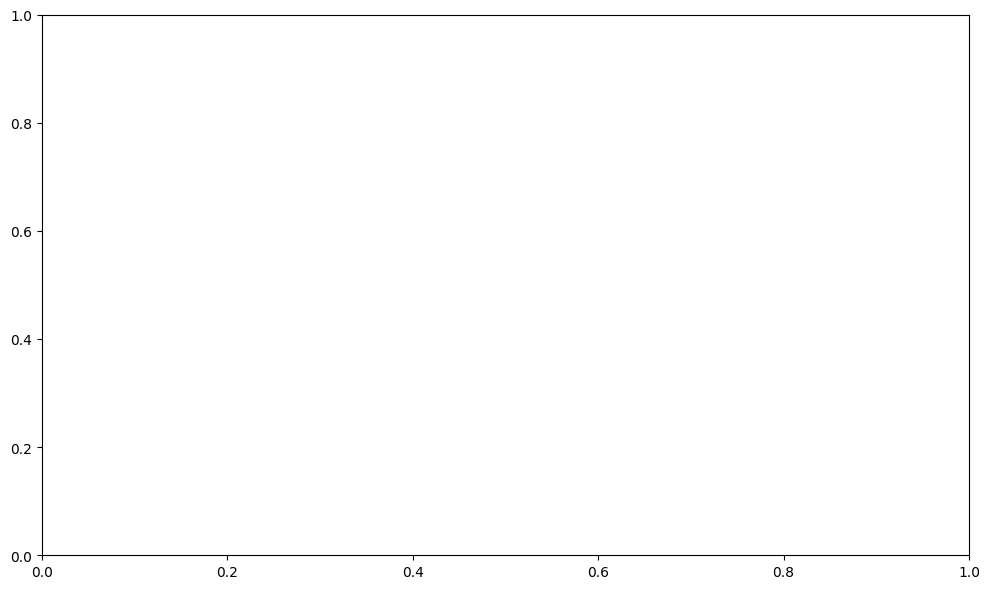

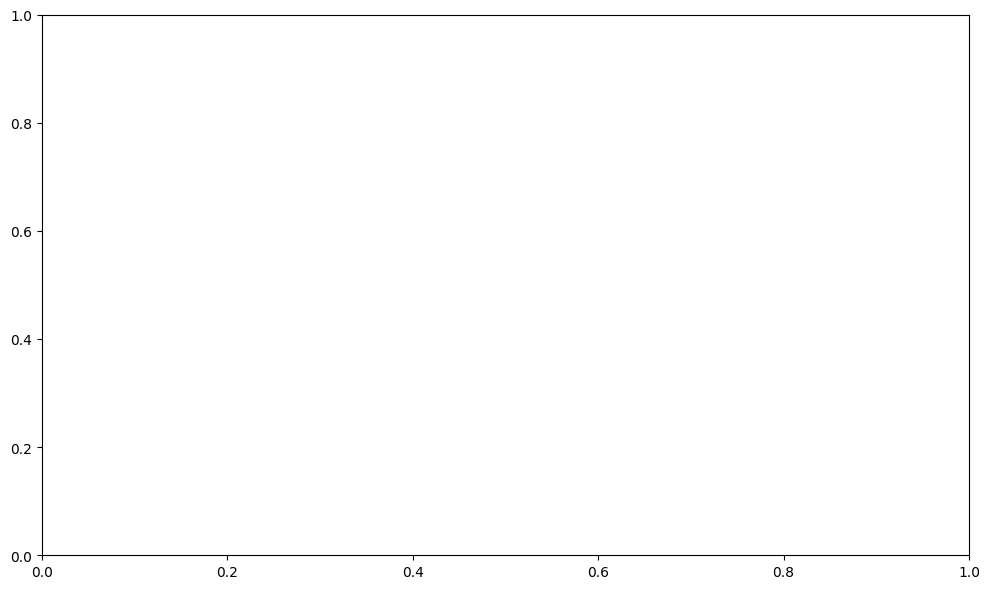

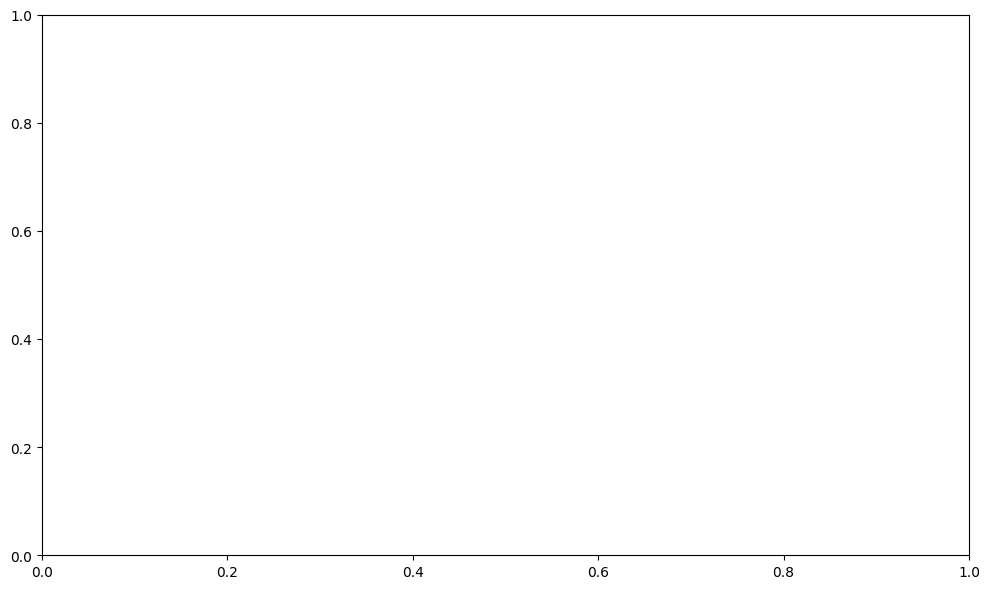

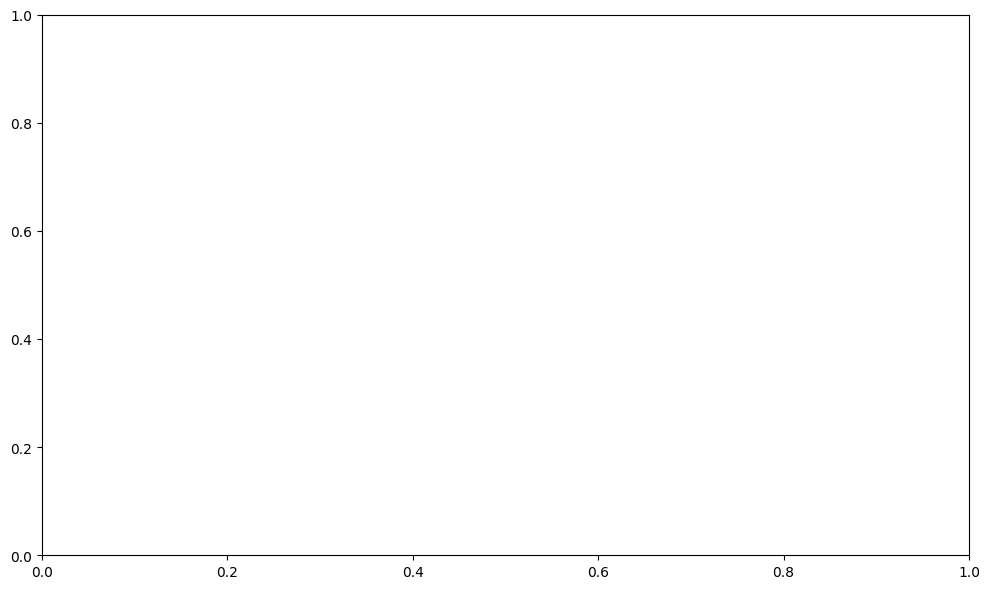

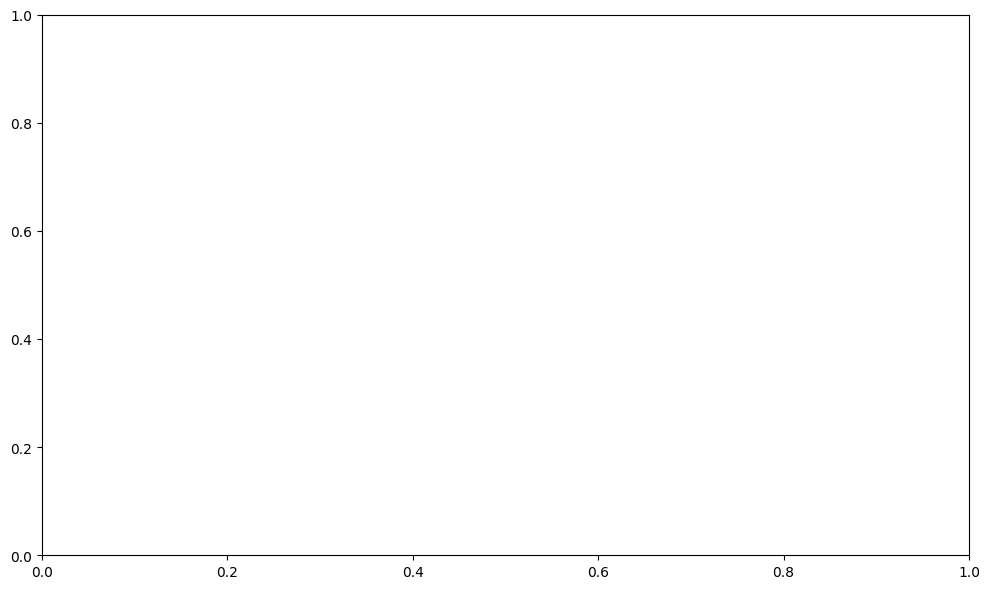

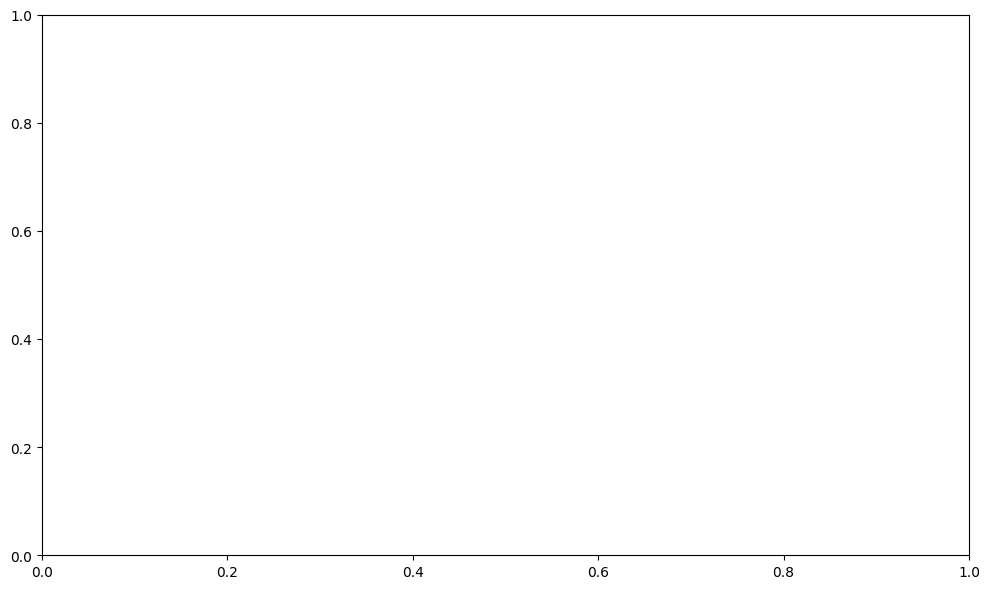

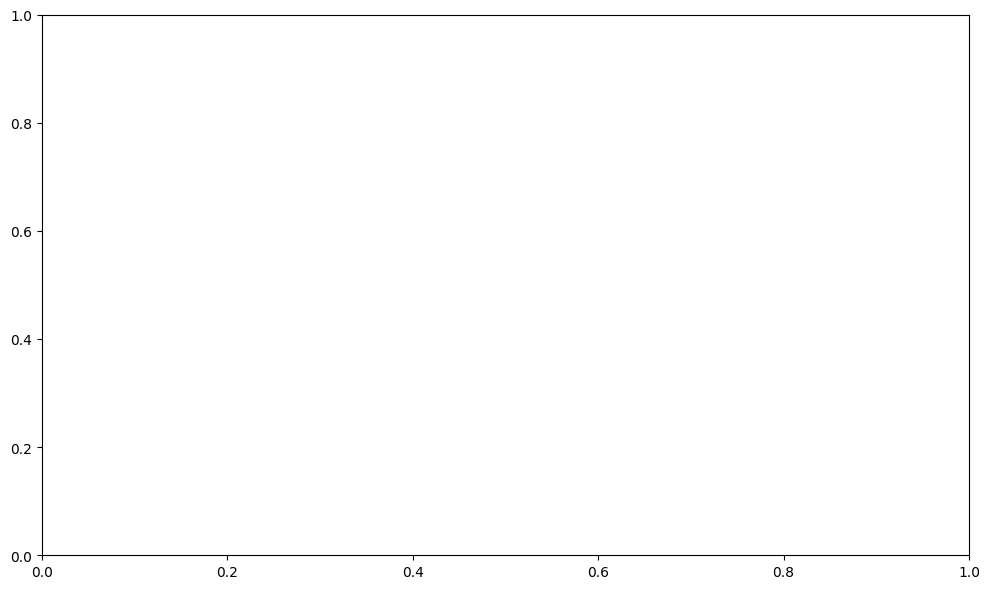

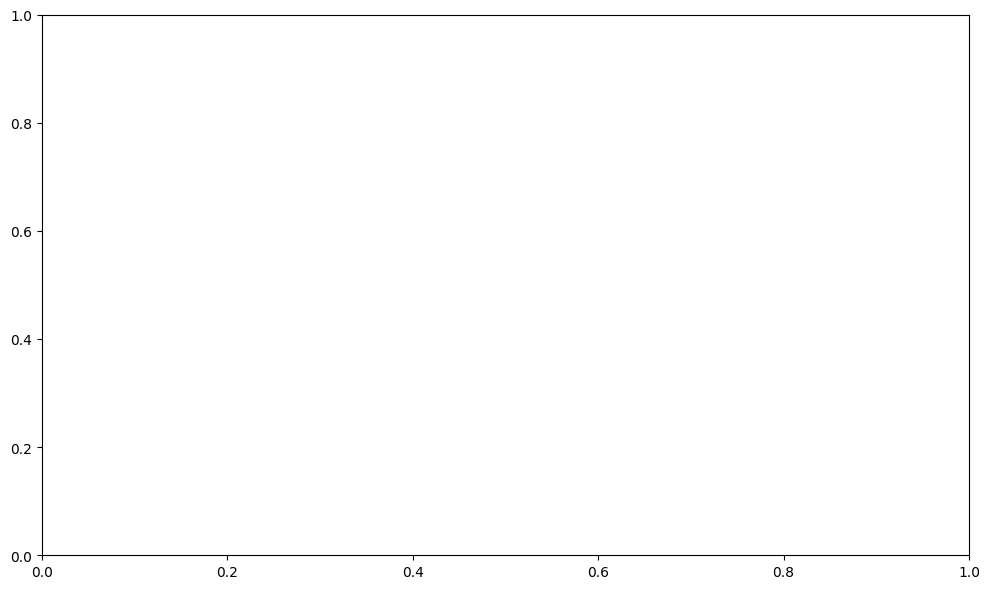

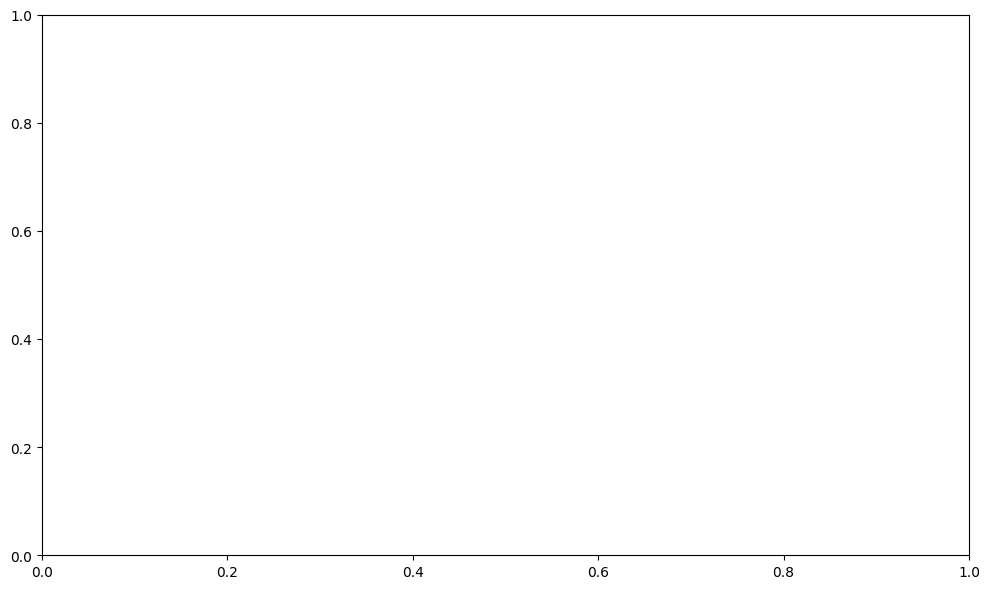

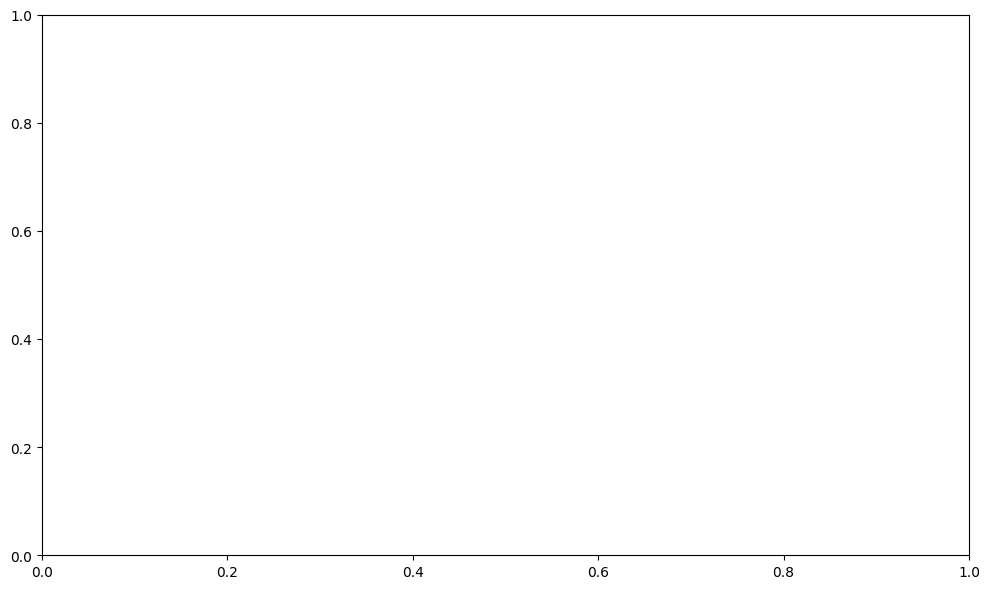

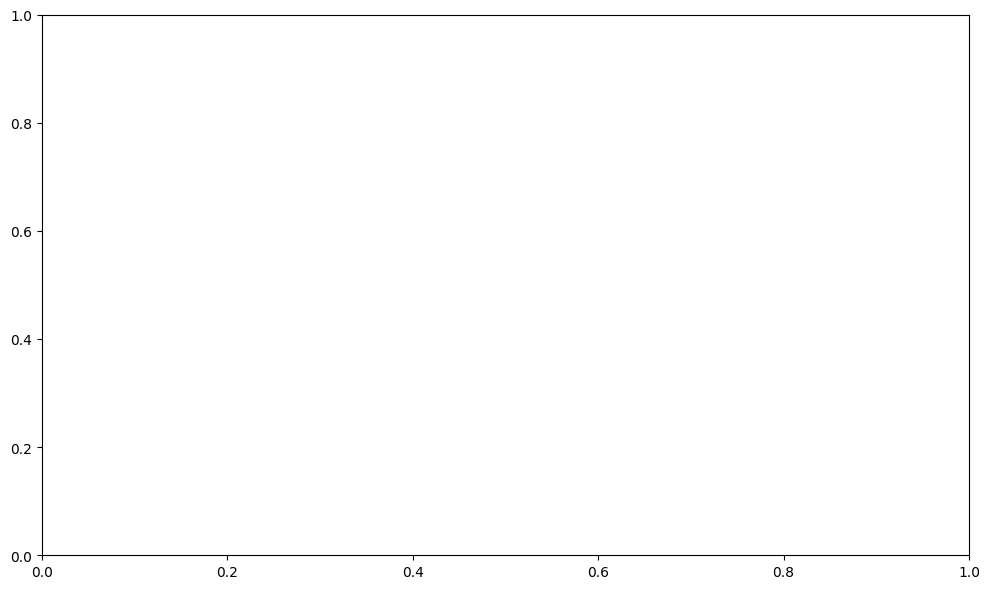

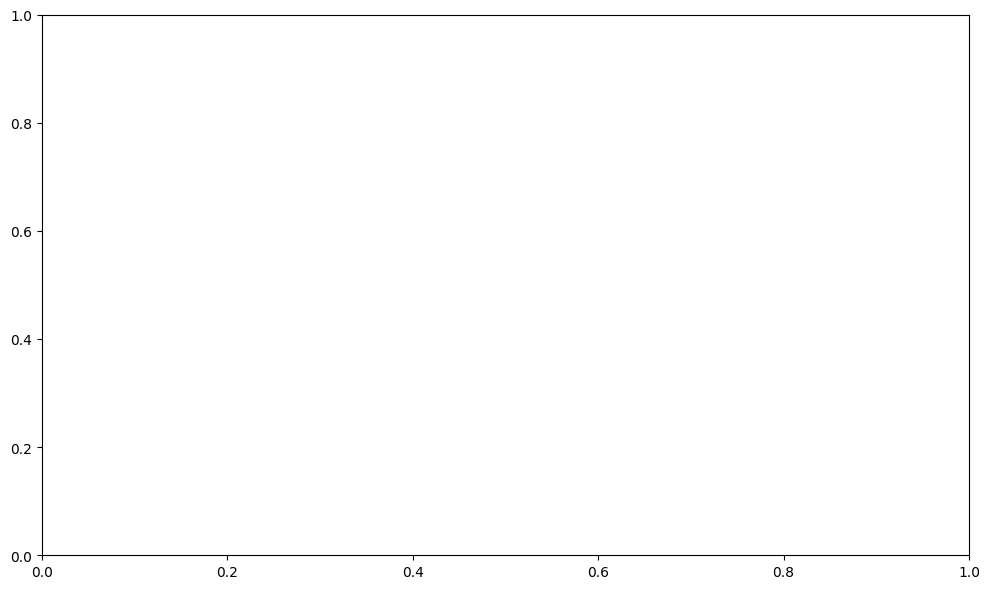

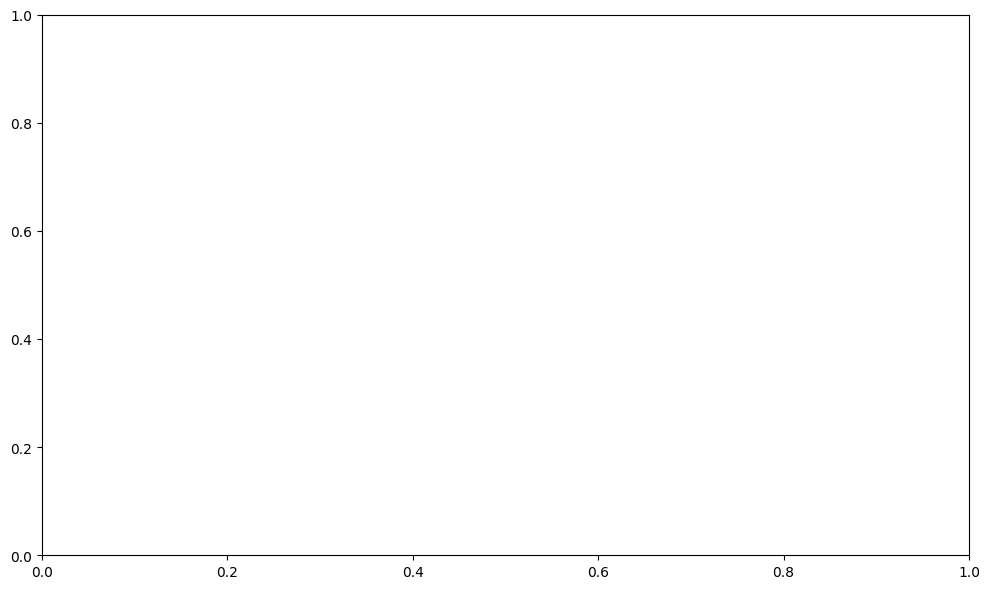

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle

# Load the tau_history from the file
with open('tau_history.pkl', 'rb') as f:
    tau_history = pickle.load(f)

countries = ['China', 'Korea', 'Japan', 'USA', 'Germany']
industries = ['steel', 'semi', 'car']

def update(frame, country_i, country_j, ax):
    ax.clear()
    for industry in industries:
        values = [tau_history[f][country_i][country_j][industry] for f in range(len(tau_history))]
        ax.plot(values, label=industry)
    ax.set_title(f'{country_i} -> {country_j}')
    ax.set_ylim(1.0, 2.0)
    ax.legend()

# Create an individual figure for each (i, j) pair and save the animation to prevent garbage collection
animations = []
for country_i in countries:
    for country_j in countries:
        if country_i != country_j:
            fig, ax = plt.subplots(figsize=(10, 6))
            ani = animation.FuncAnimation(fig, update, frames=range(100), fargs=(country_i, country_j, ax), repeat=False)
            animations.append(ani)
            plt.tight_layout()
            plt.show()
